0. 시장상황이 중요할까 물건이 중요할까
1. 지역을 잘 고르는 것은 얼마나 중요할까
2. 건물을 잘 고르는 것은 얼마나 중요할까
3. 건물 내에서 물건을 잘 고르는 것은 얼마나 중요할까
4. 지역이 중요할까 현재 가격이 중요할까
5. 어떤 평수를 고르는 것이 중요할까
6. 어떤 편의시설을 갖추고 있어야할까.
7. 최소 몇 년식이 되어야할까
8. 재건축에 대한 사인을 받을 수 있을까
9. 어느 지역이 유망할까
10. 전세가율은
 

1. 지역은 어떨까

In [120]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import os
import json

def open_json_file( file_path, encoding='utf-8'):
    with open(file_path, 'r', encoding=encoding) as file:
        data = json.load(file)
    return data

df = pd.read_csv(os.path.join('호갱노노', '실거래가','통합본2.csv'), encoding='cp949', index_col=0)

# filenames = [a+'.json' for a in list(df.index)]
# area = []
# for file in filenames :
#     data = open_json_file(os.path.join('호갱노노', '실거래가', file))
#     areaType = data[0]['areaType']
#     area.append(areaType)

# df.insert(1, 'areaType', area)
# df.to_csv(os.path.join('호갱노노', '실거래가','통합본2.csv'), encoding='cp949')


df = df.drop('aSm2e_5')
df.head()

# df.to_csv(os.path.join('호갱노노', '실거래가','통합본2.csv'), encoding='cp949', errors='replace')

In [123]:
import copy
def more_screening(df, key_criteria_val_val) :
    result  = copy.deepcopy(df)
    for key, val in key_criteria_val_val.items() :
        result = result[result[key] >= val]

    return result
def less_screening(df, key_criteria_val_val) :
    result  = copy.deepcopy(df)
    for key, val in key_criteria_val_val.items() :
        result = result[result[key] <= val]
    return result

df_screened = more_screening(df, {
    'total_household' : 500,
    'approval_date' : 19900000
})

len(df_screened)
    

1075

In [32]:
'total_household' in list(df.columns)

True

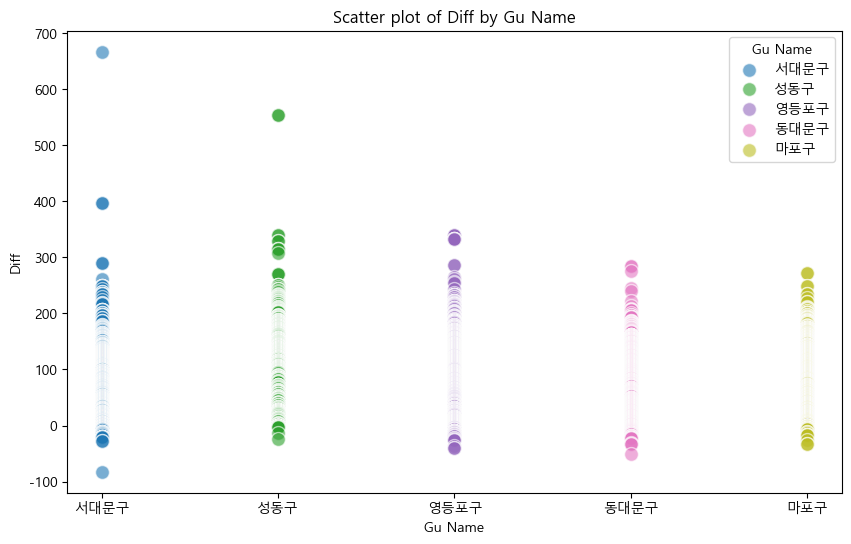

In [41]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


import matplotlib.pyplot as plt
# 'diff' 열을 숫자로 변환
try :
    df['diff'] = df['diff'].str.replace('%', '').astype(float)
except :
    pass

# 색깔 설정을 위한 색깔 맵
unique_gu_names = df['gu_name'].unique()
colors = {gu: plt.cm.tab20(i / len(unique_gu_names)) for i, gu in enumerate(unique_gu_names)}

# 산포도 그리기
plt.figure(figsize=(10, 6))
for gu in df['gu_name'].unique():
    subset = df[df['gu_name'] == gu]
    plt.scatter(subset['gu_name'], subset['diff'], c=[colors[gu]], label=gu, alpha=0.6, edgecolors='w', s=100)

plt.xlabel('Gu Name')
plt.ylabel('Diff')
plt.title('Scatter plot of Diff by Gu Name')
plt.legend(title='Gu Name')
plt.show()

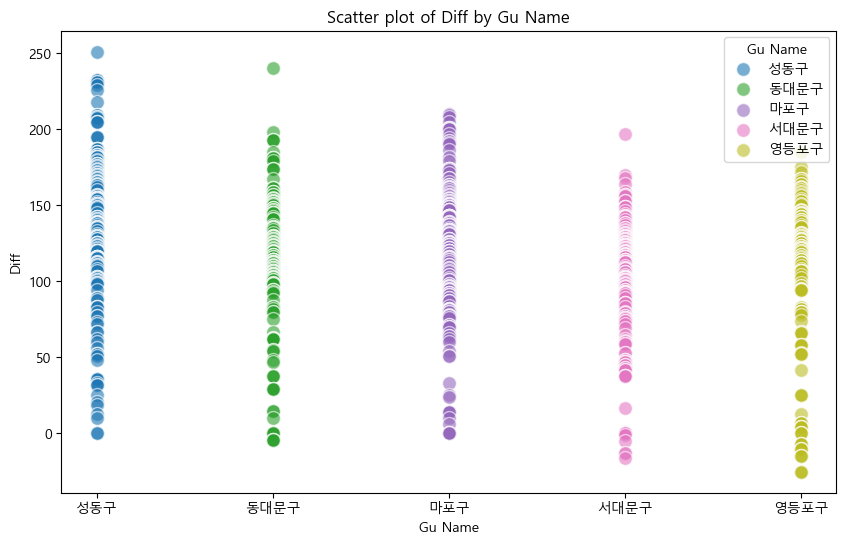

In [42]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


import matplotlib.pyplot as plt
# 'diff' 열을 숫자로 변환
try :
    df_screened['diff'] = df_screened['diff'].str.replace('%', '').astype(float)
except :
    pass

# 색깔 설정을 위한 색깔 맵
unique_gu_names = df_screened['gu_name'].unique()
colors = {gu: plt.cm.tab20(i / len(unique_gu_names)) for i, gu in enumerate(unique_gu_names)}

# 산포도 그리기
plt.figure(figsize=(10, 6))
for gu in df_screened['gu_name'].unique():
    subset = df_screened[df_screened['gu_name'] == gu]
    plt.scatter(subset['gu_name'], subset['diff'], c=[colors[gu]], label=gu, alpha=0.6, edgecolors='w', s=100)

plt.xlabel('Gu Name')
plt.ylabel('Diff')
plt.title('Scatter plot of Diff by Gu Name')
plt.legend(title='Gu Name')
plt.show()

# 가격이랑 상관
별 상관이 없어보이냐

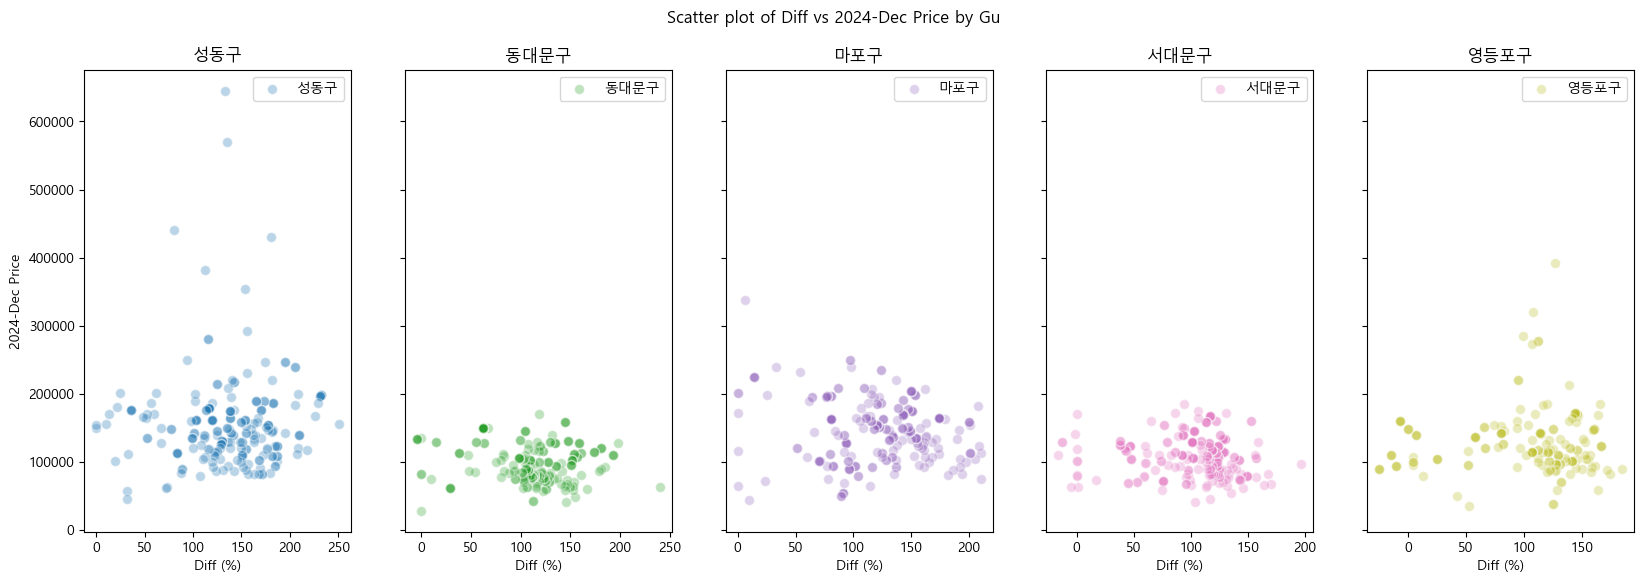

In [83]:
unique_gu_names = df_screened['gu_name'].unique()
colors = {gu: plt.cm.tab20(i / len(unique_gu_names)) for i, gu in enumerate(unique_gu_names)}

# 칸을 5칸으로 나눠서 산포도 그리기
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)
for ax, gu in zip(axes, df_screened['gu_name'].unique()):
    subset = df_screened[df_screened['gu_name'] == gu]
    ax.scatter(subset['diff'], subset['Jun-24'], c=[colors[gu]], label=gu, alpha=0.3, edgecolors='w', s=50)
    ax.set_title(gu)
    ax.set_xlabel('Diff (%)')
    ax.legend()

axes[0].set_ylabel('2024-Dec Price')
plt.suptitle('Scatter plot of Diff vs 2024-Dec Price by Gu')
plt.show()

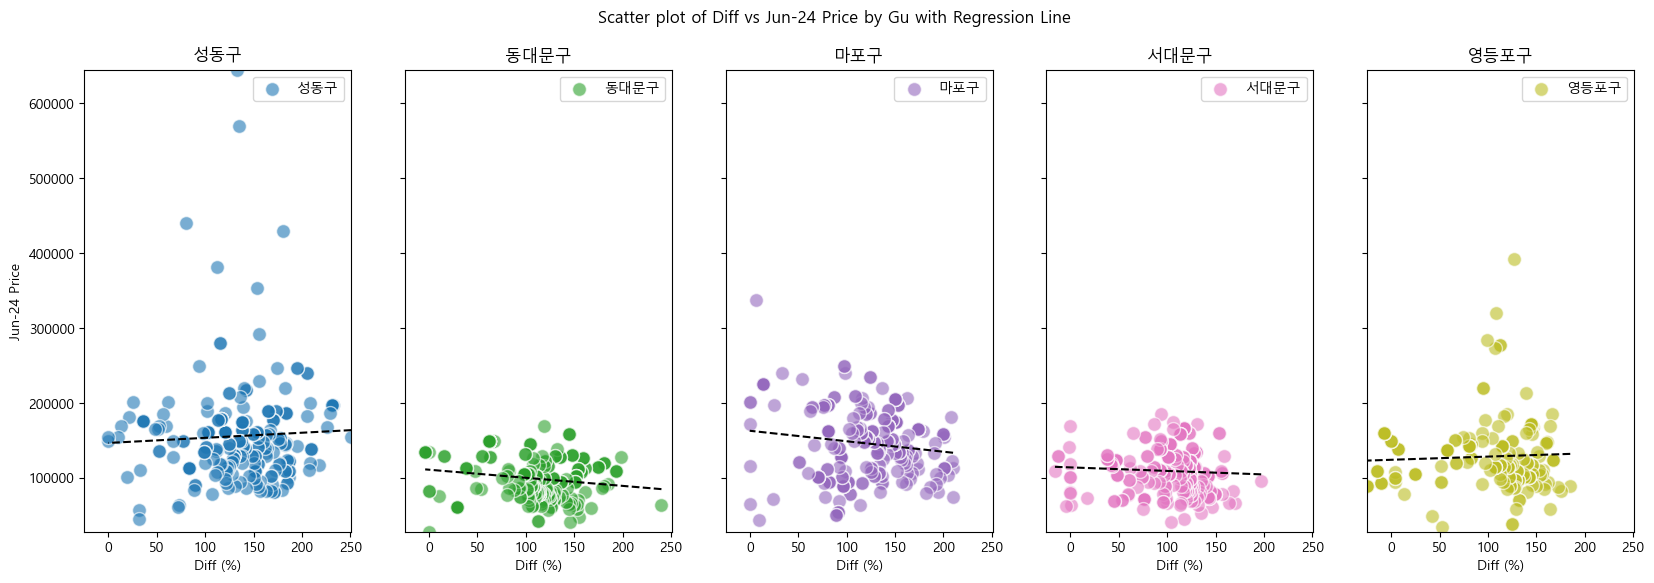

In [82]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.linear_model import LinearRegression

unique_gu_names = df_screened['gu_name'].unique()
colors = {gu: plt.cm.tab20(i / len(unique_gu_names)) for i, gu in enumerate(unique_gu_names)}

# 회귀선 및 산포도 그리기
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)
x_limits = [df_screened['diff'].min(), df_screened['diff'].max()]
y_limits = [df_screened['Jun-24'].min(), df_screened['Jun-24'].max()]

outliers = pd.DataFrame()

for ax, gu in zip(axes, df_screened['gu_name'].unique()):
    subset = df_screened[df_screened['gu_name'] == gu]
    
    # 산포도
    ax.scatter(subset['diff'], subset['Jun-24'], c=[colors[gu]], label=gu, alpha=0.6, edgecolors='w', s=100)
    
    # 회귀선
    X = subset['diff'].values.reshape(-1, 1)
    y = subset['Jun-24'].values
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    ax.plot(subset['diff'], y_pred, color='black', linestyle='--')
    
    # 회귀선보다 아래에 있는 데이터 추출
    below_line = subset[y < y_pred]
    outliers = pd.concat([outliers, below_line])
    
    ax.set_title(gu)
    ax.set_xlabel('Diff (%)')
    ax.legend()
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)

axes[0].set_ylabel('Jun-24 Price')
plt.suptitle('Scatter plot of Diff vs Jun-24 Price by Gu with Regression Line')
plt.show()

In [84]:
len(outliers)

570

In [87]:
turtles = pd.DataFrame()
below_line = subset[y > y_pred]
turtles = pd.concat([turtles, below_line])

outliers
turtles

,name,gu_name,dong_name,total_household,asile_type,approval_date,heat_source,floor_min,floor_max,lng,...,diff,rank,total_household.1,approval_date.1,floor_min.1,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245
aDhc2_10,래미안에스티움,영등포구,신길동,1722.0,계단식,20170401.0,도시가스,10.0,27.0,126.913768,...,166.0,532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1oi32_4,당산푸르지오,영등포구,영등포동8가,538.0,계단식,20040823.0,도시가스,22.0,25.0,126.906342,...,164.0,566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aDhc2_6,래미안에스티움,영등포구,신길동,1722.0,계단식,20170401.0,도시가스,10.0,27.0,126.913768,...,161.0,611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aDhc2_7,래미안에스티움,영등포구,신길동,1722.0,계단식,20170401.0,도시가스,10.0,27.0,126.913768,...,161.0,611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aDhc2_8,래미안에스티움,영등포구,신길동,1722.0,계단식,20170401.0,도시가스,10.0,27.0,126.913768,...,161.0,611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ctEc3_5,당산센트럴IPARK,영등포구,당산동5가,802.0,계단식,20200528.0,도시가스,14.0,29.0,126.903363,...,0.0,4267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctEc3_6,당산센트럴IPARK,영등포구,당산동5가,802.0,계단식,20200528.0,도시가스,14.0,29.0,126.903363,...,-7.0,4936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctEc3_7,당산센트럴IPARK,영등포구,당산동5가,802.0,계단식,20200528.0,도시가스,14.0,29.0,126.903363,...,-7.0,4936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctEc3_8,당산센트럴IPARK,영등포구,당산동5가,802.0,계단식,20200528.0,도시가스,14.0,29.0,126.903363,...,-7.0,4936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
import numpy as np
print('outlier & turtles')
print("total househod :", len(outliers['total_household']), len(turtles['total_household']))
print("total househod :", np.mean(outliers['total_household']), np.mean(turtles['total_household']))
print("recent realtrade deal price :", np.mean(outliers['Jun-24']), np.mean(turtles['Jun-24']))
print("Approval date :", np.mean(outliers['approval_date']), np.mean(turtles['approval_date']))



outlier & turtles
total househod : 570 66
total househod : 1007.2526315789473 1071.6515151515152
recent realtrade deal price : 99039.72105263158 169843.9393939394
Approval date : 20056023.215789475 20134113.37878788


# 10년 이후 신축 제거하고 다시

In [124]:
df_old = less_screening(df_screened, {
    'approval_date' : 20100000
})


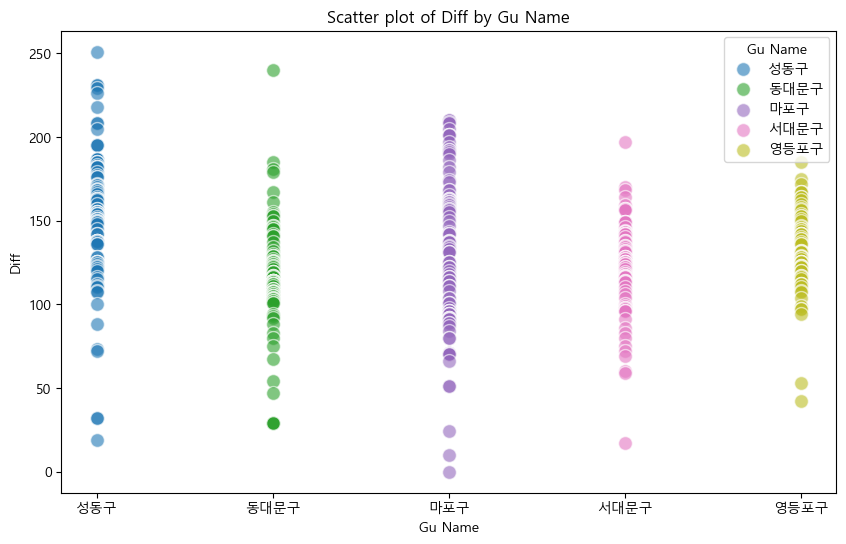

In [125]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


import matplotlib.pyplot as plt
# 'diff' 열을 숫자로 변환
try :
    df_old['diff'] = df_old['diff'].str.replace('%', '').astype(float)
except :
    pass

# 색깔 설정을 위한 색깔 맵
unique_gu_names = df_old['gu_name'].unique()
colors = {gu: plt.cm.tab20(i / len(unique_gu_names)) for i, gu in enumerate(unique_gu_names)}

# 산포도 그리기
plt.figure(figsize=(10, 6))
for gu in df_old['gu_name'].unique():
    subset = df_old[df_old['gu_name'] == gu]
    plt.scatter(subset['gu_name'], subset['diff'], c=[colors[gu]], label=gu, alpha=0.6, edgecolors='w', s=100)

plt.xlabel('Gu Name')
plt.ylabel('Diff')
plt.title('Scatter plot of Diff by Gu Name')
plt.legend(title='Gu Name')
plt.show()

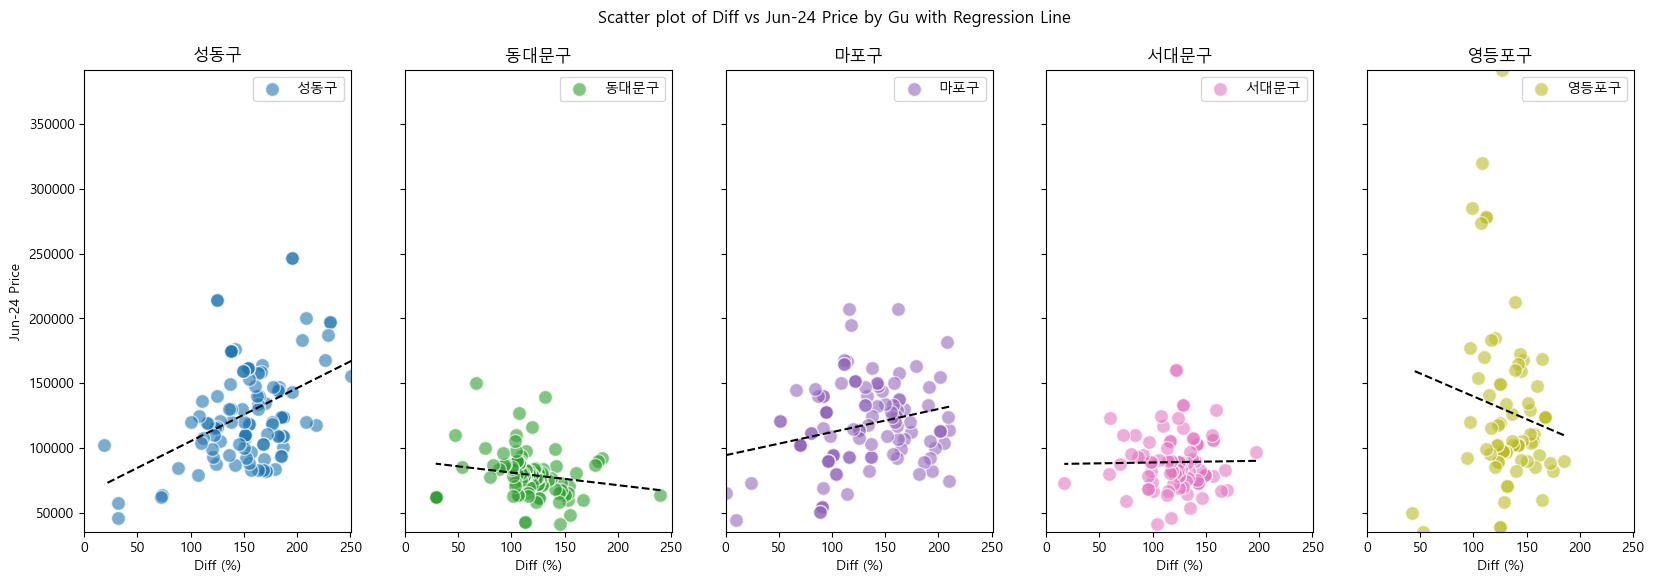

Outliers & Turtles
Records: 267 212
Total households (mean): 957.7303370786517 930.1933962264151
Diff (mean): 131.28838951310863 130.1320754716981
Recent real trade deal price (mean): 86138.57677902622 135136.320754717
Approval date (mean): 20000591.61048689 20016728.985849056


In [127]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.linear_model import LinearRegression

# Sample data for df_old (replace with actual data)
# df_old['diff'] = df_old['diff'].str.replace('%', '').astype(float)

unique_gu_names = df_old['gu_name'].unique()
colors = {gu: plt.cm.tab20(i / len(unique_gu_names)) for i, gu in enumerate(unique_gu_names)}

fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)
x_limits = [df_old['diff'].min(), df_old['diff'].max()]
y_limits = [df_old['Jun-24'].min(), df_old['Jun-24'].max()]

outliers = pd.DataFrame()
turtles = pd.DataFrame()

for ax, gu in zip(axes, df_old['gu_name'].unique()):
    subset = df_old[df_old['gu_name'] == gu]
    
    ax.scatter(subset['diff'], subset['Jun-24'], c=[colors[gu]], label=gu, alpha=0.6, edgecolors='w', s=100)
    
    X = subset['diff'].values.reshape(-1, 1)
    y = subset['Jun-24'].values
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    ax.plot(subset['diff'], y_pred, color='black', linestyle='--')
    
    below_line = subset[y < y_pred]
    outliers = pd.concat([outliers, below_line])
    
    above_line = subset[y >= y_pred]
    turtles = pd.concat([turtles, above_line])
    
    ax.set_title(gu)
    ax.set_xlabel('Diff (%)')
    ax.legend()
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)

axes[0].set_ylabel('Jun-24 Price')
plt.suptitle('Scatter plot of Diff vs Jun-24 Price by Gu with Regression Line')
plt.show()

outliers = outliers.reset_index(drop=True)
turtles = turtles.reset_index(drop=True)

print('Outliers & Turtles')
print("Records:", len(outliers), len(turtles))
print("Total households (mean):", np.mean(outliers['total_household']), np.mean(turtles['total_household']))
print("Diff (mean):", np.mean(outliers['diff']), np.mean(turtles['diff']))
print("Recent real trade deal price (mean):", np.mean(outliers['Jun-24']), np.mean(turtles['Jun-24']))
print("Approval date (mean):", np.mean(outliers['approval_date']), np.mean(turtles['approval_date']))



In [131]:


def extract_first_number(text):
    match = re.search(r'\d+', text)
    if match:
        return match.group()
    return ''

turtles['areaType'] = turtles['areaType'].apply(extract_first_number)
outliers['areaType'] = outliers['areaType'].apply(extract_first_number)

turtles.to_csv('turtles_neww.csv', encoding='cp949')
outliers.to_csv('outliers_neww.csv', encoding='cp949')
# 평수에서 차이가 나더라.

AreaType (mean): 92.86307053941908 128.64893617021278


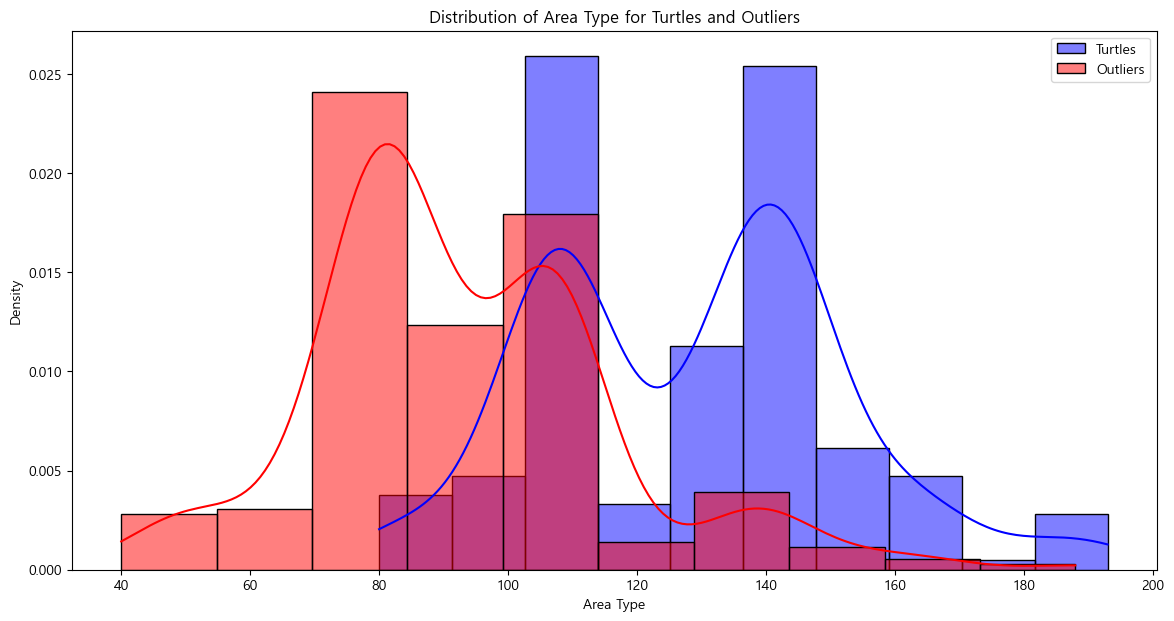

In [149]:
turtles['areaType'] = turtles['areaType'].apply(lambda x : int(x))
outliers['areaType'] = outliers['areaType'].apply(lambda x : int(x))


turltleareatype = turtles[turtles['areaType'] < 200]['areaType'].mean()
outlierareatype = outliers[outliers['areaType'] < 200]['areaType'].mean()

print("AreaType (mean):", outlierareatype,turltleareatype)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 예시 데이터 (실제 데이터로 대체하세요)
for_hist_turltleareatype = turtles[turtles['areaType'] < 200]
for_hist_outlierareatype = outliers[outliers['areaType'] < 200]



plt.figure(figsize=(14, 7))

# Turtles의 areaType 분포
sns.histplot(for_hist_turltleareatype['areaType'], kde=True, label='Turtles', color='blue', stat="density", bins=10)

# Outliers의 areaType 분포
sns.histplot(for_hist_outlierareatype['areaType'], kde=True, label='Outliers', color='red', stat="density", bins=10)

plt.xlabel('Area Type')
plt.ylabel('Density')
plt.title('Distribution of Area Type for Turtles and Outliers')
plt.legend()
plt.show()


같은 평수 내에서 성장률 차이가 나는 놈들은 뭘까

In [ ]:
mid_area_turtleareatype = turtles[(turtles['areaType'] < 120) & (turtles['areaType'] > 100)]
mid_area_outlierareatype = outliers[(outliers['areaType'] < 120) & (outliers['areaType'] > 100)]

mid_area_turtleareatype
mid_area_outlierareatype

In [152]:

print('mid_area_outlierareatype & mid_area_turtleareatype')
print("Records:", len(mid_area_outlierareatype), len(mid_area_turtleareatype))
print("Total households (mean):", np.mean(mid_area_outlierareatype['total_household']), np.mean(mid_area_turtleareatype['total_household']))
print("Diff (mean):", np.mean(mid_area_outlierareatype['diff']), np.mean(mid_area_turtleareatype['diff']))
print("Recent real trade deal price (mean):", np.mean(mid_area_outlierareatype['Jun-24']), np.mean(mid_area_turtleareatype['Jun-24']))
print("Approval date (mean):", np.mean(mid_area_outlierareatype['approval_date']), np.mean(mid_area_turtleareatype['approval_date']))

# 같은 평수대이면 %로는 가격 높은애들이 덜 오르는 경향이 있다는걸까.. 그럼 키 맞추기가 되는거 아닌가.

mid_area_outlierareatype & mid_area_turtleareatype
Records: 67 64
Total households (mean): 1031.2985074626865 936.1875
Diff (mean): 119.28358208955224 138.3125
Recent real trade deal price (mean): 92323.73134328358 117382.8125
Approval date (mean): 19999152.23880597 20014462.59375


In [153]:
mid_area_turtleareatype.to_csv('mid_area_turtleareatype.csv', encoding='cp949', errors='ignore')
mid_area_outlierareatype.to_csv('mid_area_outlierareatype.csv', encoding='cp949', errors='ignore')

급지에 따라서 다른 건 아닐까

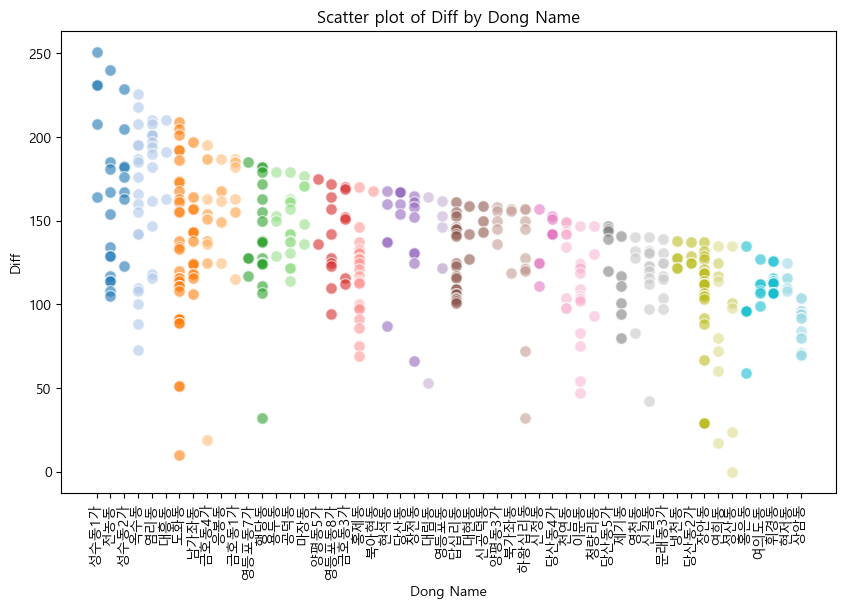

In [ ]:

import matplotlib.pyplot as plt
# 'diff' 열을 숫자로 변환
try:
    df_old['diff'] = df_old['diff'].str.replace('%', '').astype(float)
except:
    pass



# 색깔 설정을 위한 색깔 맵
unique_dong_names = df_old['dong_name'].unique()
colors = {dong: plt.cm.tab20(i / len(unique_dong_names)) for i, dong in enumerate(unique_dong_names)}

# 산포도 그리기
plt.figure(figsize=(10, 6))
for dong in df_old['dong_name'].unique():
    subset = df_old[df_old['dong_name'] == dong]
    plt.scatter(subset['dong_name'], subset['diff'], c=[colors[dong]], label=dong, alpha=0.6, edgecolors='w', s=70)

plt.xlabel('Dong Name')
plt.ylabel('Diff')
plt.title('Scatter plot of Diff by Dong Name')
plt.xticks(rotation=90)  # xtick labels 세로 정렬
plt.show()

In [197]:
unique_dong_names = df_old_sample['dong_name'].unique()
unique_area_types = df_old_sample['areaType'].unique()
colors = {area: plt.cm.tab20(i / len(unique_area_types)) for i, area in enumerate(unique_area_types)}



fig, axes = plt.subplots(11,5) 



for dong in unique_dong_names :
    target_df = df_old_sample[df_old_sample['dong_name'] == dong]
    # display(target_df.head())
    plt.scatter(
        target_df['Jun-24'],
        target_df['diff']
    )
    plt.show()

52

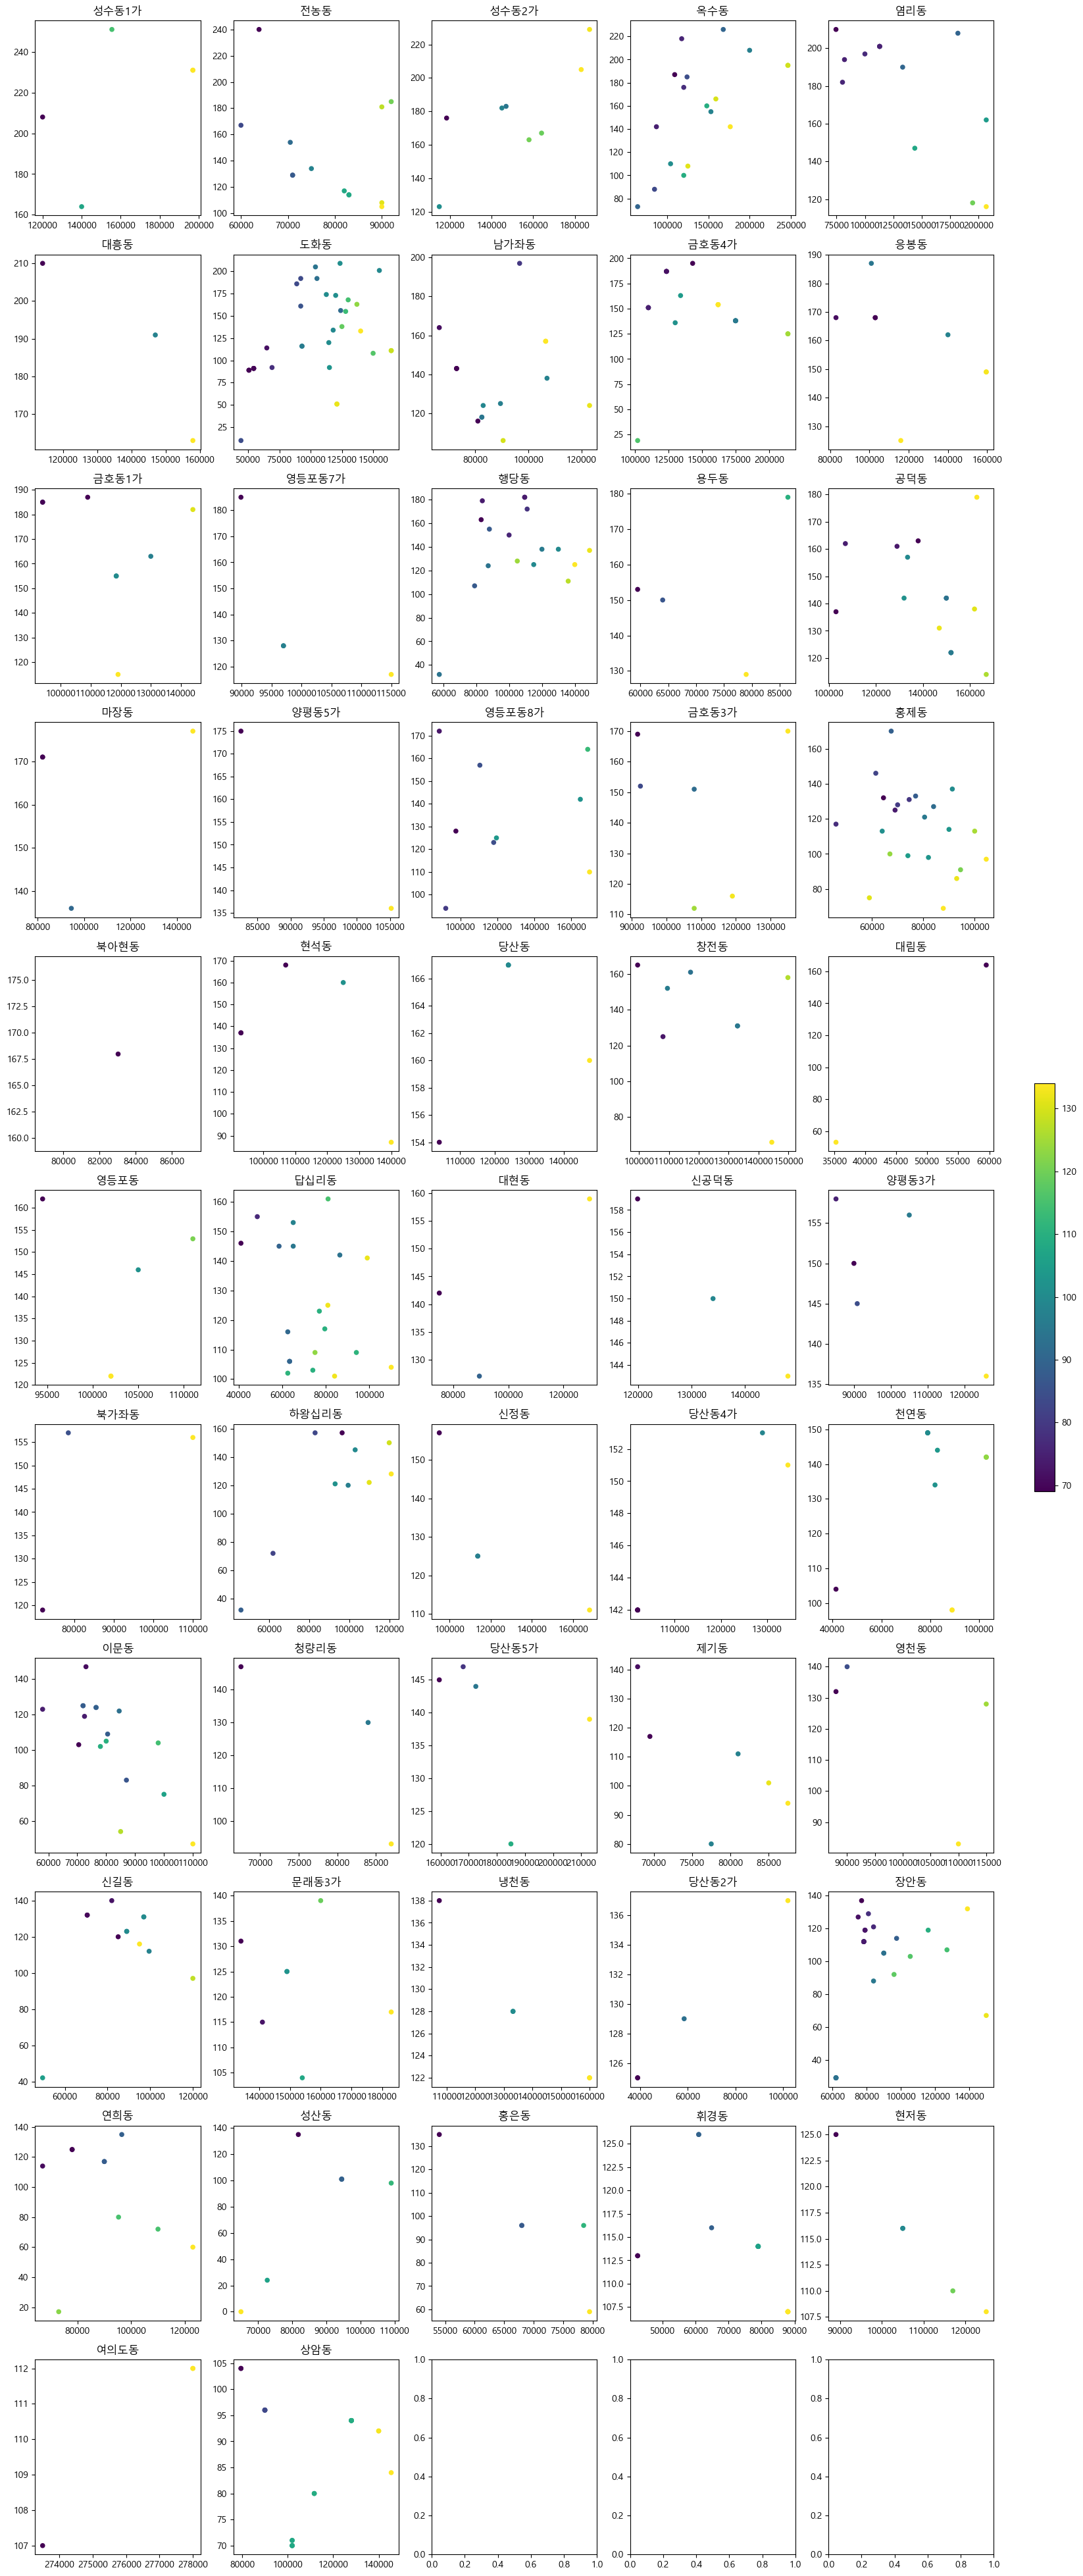

In [208]:
fig, axes = plt.subplots(11, 5, figsize=(20, 50))  # 크기 조정을 위해 figsize를 20x50으로 설정
idx = 0

for idx, dong in enumerate(unique_dong_names):
    row = idx // 5
    col = idx % 5
    target_df = df_old_sample[df_old_sample['dong_name'] == dong]
    scatter = axes[row, col].scatter(
        target_df['Jun-24'],
        target_df['diff'],
        c=target_df['areaType'],  # areaType으로 색상 지정
        s=20
    )
    axes[row, col].set_title(dong)  # 각 축에 dong 이름 추가

fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)  # 색상 바 추가
plt.show()


In [216]:
for dong in unique_dong_names :
    target_df = df_old_sample[df_old_sample['dong_name'] == dong]
    correlation = target_df['Jun-24'].corr(target_df['diff'])
    exp_diff = np.mean(target_df['diff'])
    print(dong, '{:.2f}'.format(correlation), '{:.2f}%'.format(exp_diff))


성수동1가 0.50 217.00%
전농동 -0.37 144.38%
성수동2가 0.77 178.50%
옥수동 0.60 157.44%
염리동 -0.69 179.00%
대흥동 -0.92 188.00%
도화동 0.39 129.79%
남가좌동 0.05 138.20%
금호동4가 -0.06 146.89%
응봉동 -0.47 159.50%
금호동1가 -0.27 165.88%
영등포동7가 -0.74 139.50%
행당동 0.24 138.12%
용두동 0.30 152.75%
공덕동 -0.33 142.27%
마장동 0.30 163.75%
양평동5가 -1.00 155.50%
영등포동8가 0.06 135.00%
금호동3가 -0.07 145.00%
홍제동 -0.29 114.64%
북아현동 nan 168.00%
현석동 -0.48 137.80%
당산동 0.30 163.00%
창전동 -0.46 136.12%
대림동 1.00 108.50%
영등포동 -0.08 141.00%
답십리동 -0.29 125.45%
대현동 0.73 142.67%
신공덕동 -1.00 150.67%
양평동3가 -0.69 149.00%
북가좌동 0.61 144.00%
하왕십리동 0.77 120.40%
신정동 -0.82 129.50%
당산동4가 0.97 145.33%
천연동 0.28 133.33%
이문동 -0.73 105.35%
청량리동 -0.83 123.33%
당산동5가 -0.38 139.00%
제기동 -0.67 107.33%
영천동 -0.56 120.75%
신길동 0.34 116.58%
문래동3가 -0.15 122.29%
냉천동 -0.98 127.60%
당산동2가 1.00 129.00%
장안동 0.32 98.40%
연희동 -0.22 96.20%
성산동 0.71 80.00%
홍은동 -0.88 96.40%
휘경동 -0.55 113.35%
현저동 -0.99 115.00%
여의도동 1.00 110.33%
상암동 -0.06 87.71%


In [235]:
for dong in unique_dong_names:
    target_df = df_old_sample[df_old_sample['dong_name'] == dong]
    a = target_df[['name','areaType', 'Jan-14', 'Jun-24', 'diff']]
    a.set_index('name', inplace=True)
    print(dong)
    
    # 'Jan-14'와 'Jun-24' 열에 대해서만 랭크 계산
    a['Jan-14_rank'] = a['Jan-14'].rank(method='min')
    a['Jun-24_rank'] = a['Jun-24'].rank(method='min')
    
    # 순위 차이 계산
    a['rank_diff'] = a['Jan-14_rank'] - a['Jun-24_rank']
    
    # 원래 열들을 유지한 상태로 출력
    display(a)


성수동1가


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
쌍용,99,44300,155500,251.0,2.0,3.0,-1.0
강변건영,109,59500,197000,231.0,4.0,4.0,0.0
강변건영,109,59500,197000,231.0,4.0,4.0,0.0
쌍용,75,38900,120000,208.0,1.0,1.0,0.0
강변건영,95,53000,140000,164.0,3.0,2.0,1.0


전농동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
전농우성,55,18800,63850,240.0,1.0,2.0,-1.0
전농우성,126,32250,92000,185.0,8.0,13.0,-5.0
전농우성,136,32000,90000,181.0,6.0,10.0,-4.0
전농우성,75,22500,60000,167.0,2.0,1.0,1.0
전농삼성,86,27800,70500,154.0,3.0,3.0,0.0
전농우성,95,32000,75000,134.0,6.0,6.0,0.0
전농SK1차,80,31000,71000,129.0,4.0,4.0,0.0
전농SK1차,80,31000,71000,129.0,4.0,4.0,0.0
전농삼성,109,37800,82000,117.0,9.0,7.0,2.0


성수동2가


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
성수아이파크,139,56900,187000,229.0,5.0,8.0,-3.0
성수롯데캐슬파크,140,59999,183000,205.0,6.0,7.0,-1.0
성수롯데캐슬파크,103,52000,147000,183.0,4.0,4.0,0.0
성수아이파크,106,51500,145000,182.0,2.0,3.0,-1.0
성수롯데캐슬파크,79,43000,118500,176.0,1.0,2.0,-1.0
성수롯데캐슬파크,126,61500,164000,167.0,8.0,6.0,2.0
성수아이파크,127,60000,158000,163.0,7.0,5.0,2.0
성수롯데캐슬파크,109,51500,115000,123.0,2.0,1.0,1.0


옥수동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
옥수현대,98,51500,168000,226.0,9.0,14.0,-5.0
극동그린,83,36900,117500,218.0,2.0,6.0,-4.0
옥수하이츠,105,65000,200000,208.0,15.0,16.0,-1.0
옥수하이츠,139,83500,246500,195.0,17.0,17.0,0.0
옥수하이츠,139,83500,246500,195.0,17.0,17.0,0.0
옥수현대,76,38000,109000,187.0,4.0,5.0,-1.0
옥수현대,92,43500,124000,185.0,5.0,9.0,-4.0
옥수삼성,85,43500,120000,176.0,5.0,7.0,-2.0
옥수현대,140,59700,159000,166.0,11.0,13.0,-2.0


염리동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
염리상록,70,24000,74500,210.0,1.0,1.0,0.0
마포자이1차,108,59000,182000,208.0,10.0,10.0,0.0
염리삼성래미안,81,37500,113000,201.0,5.0,5.0,0.0
염리삼성래미안,81,37500,113000,201.0,5.0,5.0,0.0
염리삼성래미안,81,37500,113000,201.0,5.0,5.0,0.0
염리삼성래미안,84,33700,100000,197.0,4.0,4.0,0.0
염리상록,81,27850,82000,194.0,2.0,3.0,-1.0
염리삼성래미안,109,45900,133300,190.0,8.0,8.0,0.0
염리상록,83,28500,80250,182.0,3.0,2.0,1.0


대흥동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
대흥동태영,83,36750,114000,210.0,1.0,1.0,0.0
대흥동태영,109,50500,147000,191.0,2.0,2.0,0.0
대흥동태영,142,60000,158000,163.0,3.0,3.0,0.0


도화동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
도화3지구우성,107,40000,123500,209.0,13.0,23.0,-10.0
도화현대1차,94,34000,103800,205.0,9.0,14.0,-5.0
마포삼성,104,51450,155000,201.0,23.0,31.0,-8.0
도화3지구우성,92,35900,105000,192.0,11.0,15.0,-4.0
도화현대1차,75,31500,92000,192.0,8.0,10.0,-2.0
도화3지구우성,75,31100,88800,186.0,7.0,9.0,-2.0
도화현대1차,106,41000,112500,174.0,15.0,16.0,-1.0
도화현대홈타운2차,107,43900,120000,173.0,18.0,20.0,-2.0
도화3지구우성,132,48500,130000,168.0,19.0,27.0,-8.0


남가좌동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
남가좌현대,94,32600,96700,197.0,5.0,11.0,-6.0
남가좌현대,86,25200,66500,164.0,1.0,1.0,0.0
DMC래미안클라시스,145,41500,106500,157.0,11.0,12.0,-1.0
DMC래미안클라시스,145,41500,106500,157.0,11.0,12.0,-1.0
DMC래미안클라시스,84,30000,73000,143.0,2.0,2.0,0.0
DMC래미안클라시스,84,30000,73000,143.0,2.0,2.0,0.0
DMC래미안클라시스,84,30000,73000,143.0,2.0,2.0,0.0
래미안남가좌2차,111,45000,107000,138.0,14.0,14.0,0.0
DMC래미안클라시스,110,39800,89500,125.0,10.0,9.0,1.0


금호동4가


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
서울숲1차푸르지오,73,48500,143000,195.0,7.0,10.0,-3.0
서울숲1차푸르지오,76,43000,123500,187.0,1.0,5.0,-4.0
서울숲1차푸르지오,76,43000,123500,187.0,1.0,5.0,-4.0
서울숲1차푸르지오,76,43000,123500,187.0,1.0,5.0,-4.0
금호대우,112,51000,134000,163.0,8.0,9.0,-1.0
금호대우,145,63800,162000,154.0,10.0,11.0,-1.0
금호대우,145,63800,162000,154.0,10.0,11.0,-1.0
금호대우,145,63800,162000,154.0,10.0,11.0,-1.0
금호대우,79,43900,110000,151.0,4.0,2.0,2.0


응봉동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
금호현대,104,35200,101000,187.0,2.0,2.0,0.0
금호현대,81,31000,83000,168.0,1.0,1.0,0.0
대림강변타운,79,38500,103000,168.0,3.0,3.0,0.0
대림강변타운,79,38500,103000,168.0,3.0,3.0,0.0
대림강변타운,107,53500,140000,162.0,6.0,6.0,0.0
대림강변타운,142,64000,159500,149.0,7.0,7.0,0.0
대림강변타운,142,64000,159500,149.0,7.0,7.0,0.0
금호현대,143,51500,116000,125.0,5.0,5.0,0.0


금호동1가


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
금호삼성래미안,78,38000,109000,187.0,3.0,3.0,0.0
벽산,86,33000,94000,185.0,1.0,1.0,0.0
벽산,78,33000,94000,185.0,1.0,1.0,0.0
금호삼성래미안,138,51000,144000,182.0,7.0,8.0,-1.0
금호삼성래미안,105,49500,130000,163.0,6.0,7.0,-1.0
벽산,110,46500,118500,155.0,4.0,4.0,0.0
벽산,108,46500,118500,155.0,4.0,4.0,0.0
벽산,141,55400,119100,115.0,8.0,6.0,2.0


영등포동7가


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
경남아너스빌,83,31500,89900,185.0,1.0,1.0,0.0
경남아너스빌,108,42500,97000,128.0,2.0,2.0,0.0
경남아너스빌,108,42500,97000,128.0,2.0,2.0,0.0
경남아너스빌,141,53000,115000,117.0,4.0,4.0,0.0


행당동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
서울숲한신더휴,81,38800,109500,182.0,5.0,9.0,-4.0
서울숲한신더휴,81,38800,109500,182.0,5.0,9.0,-4.0
신동아,81,30000,83700,179.0,1.0,4.0,-3.0
행당한진타운,86,40850,111000,172.0,9.0,11.0,-2.0
신동아,76,31500,83000,163.0,2.0,3.0,-1.0
신동아,95,34500,88000,155.0,3.0,6.0,-3.0
행당대림,83,40000,100000,150.0,8.0,7.0,1.0
행당한진타운,108,54700,130000,138.0,14.0,14.0,0.0
행당대림,104,50500,120000,138.0,12.0,13.0,-1.0


용두동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
신동아,87,31000,86500,179.0,3.0,4.0,-1.0
신동아,61,23500,59500,153.0,1.0,1.0,0.0
신동아,72,25600,64000,150.0,2.0,2.0,0.0
신동아,102,34500,79000,129.0,4.0,3.0,1.0


공덕동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
공덕삼성래미안2차,144,58500,163000,179.0,7.0,14.0,-7.0
래미안공덕3차,80,52500,138000,163.0,5.0,6.0,-1.0
공덕삼성1차,85,40800,107000,162.0,1.0,2.0,-1.0
래미안공덕4차,84,49500,129000,161.0,3.0,3.0,0.0
공덕삼성래미안2차,110,52000,133500,157.0,4.0,5.0,-1.0
공덕삼성1차,112,54500,132000,142.0,6.0,4.0,2.0
래미안공덕4차,105,62000,150000,142.0,8.0,8.0,0.0
래미안공덕4차,104,62000,150000,142.0,8.0,8.0,0.0
래미안공덕4차,141,68000,162000,138.0,11.0,13.0,-2.0


마장동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
청계현대,162,53000,147000,177.0,4.0,4.0,0.0
청계현대,81,30300,82100,171.0,1.0,1.0,0.0
청계현대,81,30300,82100,171.0,1.0,1.0,0.0
청계현대,108,40000,94500,136.0,3.0,3.0,0.0


양평동5가


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
양평동한신,83,30000,82500,175.0,1.0,1.0,0.0
양평동한신,109,44500,105200,136.0,2.0,2.0,0.0


영등포동8가


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
영등포삼환,86,32500,88500,172.0,1.0,1.0,0.0
당산푸르지오,156,64000,169000,164.0,7.0,8.0,-1.0
영등포삼환,107,43000,110500,157.0,3.0,4.0,-1.0
당산푸르지오,137,68300,165000,142.0,8.0,7.0,1.0
당산푸르지오,79,42800,97500,128.0,2.0,3.0,-1.0
영등포삼환,140,53000,119500,125.0,5.0,6.0,-1.0
당산푸르지오,106,53000,118000,123.0,5.0,5.0,0.0
당산푸르지오,193,81000,170000,110.0,9.0,9.0,0.0
당산푸르지오,99,47500,92000,94.0,4.0,2.0,2.0


금호동3가


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
두산,145,50000,135000,170.0,4.0,6.0,-2.0
두산,82,34100,91700,169.0,1.0,1.0,0.0
두산,96,36750,92500,152.0,2.0,2.0,0.0
두산,104,43000,108000,151.0,3.0,3.0,0.0
두산,144,55000,119000,116.0,6.0,5.0,1.0
두산,136,51000,108000,112.0,5.0,3.0,2.0


홍제동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
유원하나,92,25000,67500,170.0,2.0,7.0,-5.0
문화촌현대,85,25000,61500,146.0,2.0,3.0,-1.0
청구1차,104,38500,91300,137.0,15.0,18.0,-3.0
홍제현대,91,33000,77000,133.0,9.0,12.0,-3.0
홍제현대,71,27800,64500,132.0,4.0,5.0,-1.0
홍제원현대,82,32300,74500,131.0,8.0,11.0,-3.0
인왕산현대,83,30700,70000,128.0,7.0,9.0,-2.0
홍제한양,95,37000,84000,127.0,13.0,15.0,-2.0
홍제한양,76,30600,69000,125.0,6.0,8.0,-2.0


북아현동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
두산,82,31000,83000,168.0,1.0,1.0,0.0


현석동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
강변힐스테이트,79,40000,107000,168.0,3.0,3.0,0.0
강변힐스테이트,106,48000,125000,160.0,4.0,4.0,0.0
강변힐스테이트,79,39200,93000,137.0,1.0,1.0,0.0
강변힐스테이트,79,39200,93000,137.0,1.0,1.0,0.0
강변힐스테이트,133,75000,140000,87.0,5.0,5.0,0.0


당산동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
강변래미안,111,46500,124000,167.0,2.0,2.0,0.0
강변래미안,111,46500,124000,167.0,2.0,2.0,0.0
강변래미안,111,46500,124000,167.0,2.0,2.0,0.0
강변래미안,145,56700,147500,160.0,5.0,5.0,0.0
강변래미안,81,41000,104000,154.0,1.0,1.0,0.0


창전동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
창전삼성,79,37500,99500,165.0,1.0,1.0,0.0
태영,105,45000,117250,161.0,3.0,4.0,-1.0
창전삼성,141,58000,149900,158.0,7.0,8.0,-1.0
창전삼성,108,43500,109500,152.0,2.0,3.0,-1.0
서강쌍용예가,107,57500,133000,131.0,5.0,5.0,0.0
서강쌍용예가,107,57500,133000,131.0,5.0,5.0,0.0
서강쌍용예가,83,48000,108000,125.0,4.0,2.0,2.0
서강쌍용예가,149,87000,144500,66.0,8.0,7.0,1.0


대림동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
현대3차,56,22500,59500,164.0,1.0,2.0,-1.0
현대3차,61,23000,35300,53.0,2.0,1.0,1.0


영등포동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
영등포푸르지오,85,36100,94500,162.0,1.0,1.0,0.0
영등포푸르지오,109,43800,111000,153.0,3.0,5.0,-2.0
영등포푸르지오,100,42750,105000,146.0,2.0,4.0,-2.0
영등포푸르지오,115,45900,102000,122.0,4.0,2.0,2.0
영등포푸르지오,115,45900,102000,122.0,4.0,2.0,2.0


답십리동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
동답한신,115,31000,81000,161.0,9.0,15.0,-6.0
동답한신,58,19000,48500,155.0,2.0,2.0,0.0
동아,89,25700,65000,153.0,4.0,8.0,-4.0
동답한신,47,16700,41000,146.0,1.0,1.0,0.0
두산1단지,85,26500,65000,145.0,5.0,8.0,-3.0
동답한신,77,23900,58500,145.0,3.0,3.0,0.0
답십리두산위브,83,35700,86400,142.0,12.0,17.0,-5.0
답십리청솔우성1차,140,41000,99000,141.0,17.0,19.0,-2.0
동아,141,36000,80900,125.0,14.0,14.0,0.0


대현동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
신촌럭키,142,50000,129500,159.0,3.0,3.0,0.0
신촌럭키,81,31000,74950,142.0,1.0,1.0,0.0
신촌럭키,100,39500,89500,127.0,2.0,2.0,0.0


신공덕동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
신공덕삼성래미안1차,81,46300,119900,159.0,1.0,1.0,0.0
신공덕삼성래미안1차,109,53500,134000,150.0,2.0,2.0,0.0
신공덕삼성래미안1차,142,61000,148000,143.0,3.0,3.0,0.0


양평동3가


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
거성파스텔,80,33000,85000,158.0,1.0,1.0,0.0
거성파스텔,107,41000,105000,156.0,4.0,4.0,0.0
양평동6차현대,72,35950,89900,150.0,2.0,2.0,0.0
거성파스텔,92,37000,90800,145.0,3.0,3.0,0.0
거성파스텔,158,53500,126000,136.0,5.0,5.0,0.0


북가좌동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
북가좌삼호,103,30500,78500,157.0,1.0,2.0,-1.0
북가좌삼호,134,43000,110000,156.0,3.0,3.0,0.0
북가좌삼호,93,32900,72000,119.0,2.0,1.0,1.0


하왕십리동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
왕십리풍림아이원,74,37500,96500,157.0,4.0,5.0,-1.0
왕십리극동미라주,89,32300,83000,157.0,1.0,3.0,-2.0
청계벽산,139,48000,120000,150.0,8.0,9.0,-1.0
청계벽산,107,42000,103000,145.0,5.0,7.0,-2.0
왕십리풍림아이원,144,53000,121000,128.0,10.0,10.0,0.0
왕십리극동미라주,141,49500,110000,122.0,9.0,8.0,1.0
왕십리극동미라주,109,42000,93000,121.0,5.0,4.0,1.0
왕십리풍림아이원,104,45200,99500,120.0,7.0,6.0,1.0
청계벽산,88,36000,62000,72.0,3.0,2.0,1.0


신정동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
서강GS,87,37000,95000,157.0,1.0,1.0,0.0
서강GS,114,50500,113680,125.0,2.0,2.0,0.0
서강GS,114,50500,113680,125.0,2.0,2.0,0.0
서강GS,150,79500,168000,111.0,4.0,4.0,0.0


당산동4가


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
당산현대5차,99,51000,129000,153.0,5.0,5.0,0.0
당산현대5차,129,53500,134500,151.0,6.0,6.0,0.0
당산현대5차,74,42200,102000,142.0,1.0,1.0,0.0
당산현대5차,74,42200,102000,142.0,1.0,1.0,0.0
당산현대5차,74,42200,102000,142.0,1.0,1.0,0.0
당산현대5차,74,42200,102000,142.0,1.0,1.0,0.0


천연동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
천연뜨란채,75,31700,79000,149.0,2.0,2.0,0.0
천연뜨란채,75,31700,79000,149.0,2.0,2.0,0.0
천연뜨란채,75,31700,79000,149.0,2.0,2.0,0.0
천연뜨란채,75,31700,79000,149.0,2.0,2.0,0.0
천연뜨란채,79,34000,83000,144.0,6.0,7.0,-1.0
천연뜨란채,101,42600,103000,142.0,8.0,10.0,-2.0
천연뜨란채,101,42600,103000,142.0,8.0,10.0,-2.0
천연뜨란채,101,42600,103000,142.0,8.0,10.0,-2.0
천연뜨란채,77,35000,82000,134.0,7.0,6.0,1.0


이문동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
쌍용,81,29500,73000,147.0,2.0,6.0,-4.0
이문현대,107,32000,72000,125.0,3.0,3.0,0.0
이문현대,107,32000,72000,125.0,3.0,3.0,0.0
쌍용,108,34100,76500,124.0,6.0,7.0,-1.0
쌍용,108,34100,76500,124.0,6.0,7.0,-1.0
이문현대,86,26000,58000,123.0,1.0,1.0,0.0
이문e편한세상,114,38000,84500,122.0,9.0,12.0,-3.0
이문e편한세상,85,33100,72500,119.0,5.0,5.0,0.0
이문e편한세상,107,38500,80500,109.0,10.0,11.0,-1.0


청량리동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
한신,85,27300,67500,147.0,1.0,1.0,0.0
한신,107,36500,84000,130.0,2.0,2.0,0.0
한신,140,45000,87000,93.0,3.0,3.0,0.0


당산동5가


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
당산삼성래미안4차,122,68000,168000,147.0,2.0,2.0,0.0
당산삼성래미안4차,109,65000,159500,145.0,1.0,1.0,0.0
당산삼성래미안4차,142,70800,172500,144.0,3.0,3.0,0.0
당산삼성래미안4차,193,89100,213000,139.0,5.0,5.0,0.0
당산삼성래미안4차,161,84000,185000,120.0,4.0,4.0,0.0


제기동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
한신,83,28200,67900,141.0,1.0,1.0,0.0
안암골벽산,81,32000,69500,117.0,2.0,2.0,0.0
한신,108,38300,81000,111.0,3.0,4.0,-1.0
한신,141,42200,85000,101.0,4.0,5.0,-1.0
안암골벽산,143,45000,87500,94.0,6.0,6.0,0.0
안암골벽산,108,43000,77500,80.0,5.0,3.0,2.0


영천동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
독립문삼호,104,37500,90000,140.0,1.0,2.0,-1.0
독립문삼호,94,38000,88000,132.0,2.0,1.0,1.0
독립문삼호,130,50500,115000,128.0,3.0,4.0,-1.0
독립문삼호,136,60000,110000,83.0,4.0,3.0,1.0


신길동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
삼환,81,34200,82000,140.0,3.0,4.0,-1.0
신길삼성래미안,79,30400,70500,132.0,1.0,2.0,-1.0
신길삼성래미안,79,30400,70500,132.0,1.0,2.0,-1.0
삼환,108,42000,97000,131.0,8.0,9.0,-1.0
삼환,108,42000,97000,131.0,8.0,9.0,-1.0
신길삼성래미안,108,40000,89000,123.0,6.0,6.0,0.0
신길삼성래미안,108,40000,89000,123.0,6.0,6.0,0.0
보라매경남아너스빌,78,38700,85000,120.0,5.0,5.0,0.0
신길삼성래미안,141,44000,95000,116.0,10.0,8.0,2.0


문래동3가


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
문래힐스테이트,168,67000,160000,139.0,5.0,6.0,-1.0
문래힐스테이트,111,58000,134000,131.0,1.0,1.0,0.0
문래힐스테이트,149,66300,149000,125.0,3.0,3.0,0.0
문래힐스테이트,149,66300,149000,125.0,3.0,3.0,0.0
문래자이,185,84500,183000,117.0,7.0,7.0,0.0
문래자이,115,65500,141000,115.0,2.0,2.0,0.0
문래자이,155,75400,154000,104.0,6.0,5.0,1.0


냉천동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
돈의문센트레빌,80,45200,107400,138.0,1.0,1.0,0.0
돈의문센트레빌,108,58400,133200,128.0,2.0,2.0,0.0
돈의문센트레빌,108,58400,133200,128.0,2.0,2.0,0.0
돈의문센트레빌,137,72000,160000,122.0,4.0,4.0,0.0
돈의문센트레빌,138,72000,160000,122.0,4.0,4.0,0.0


당산동2가


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
현대,101,43000,102000,137.0,4.0,4.0,0.0
대우,66,25500,58500,129.0,3.0,3.0,0.0
대우,46,17300,39000,125.0,1.0,1.0,0.0
대우,46,17300,39000,125.0,1.0,1.0,0.0


장안동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
래미안장안2차,71,32500,77000,137.0,1.0,6.0,-5.0
장안현대홈타운1차,168,60000,139000,132.0,23.0,24.0,-1.0
장안래미안1차,84,35400,81000,129.0,3.0,14.0,-11.0
장안현대홈타운1차,75,33000,75000,127.0,2.0,5.0,-3.0
래미안장안2차,82,38000,84000,121.0,11.0,15.0,-4.0
장안현대홈타운1차,76,36000,79000,119.0,4.0,12.0,-8.0
장안현대홈타운1차,76,36000,79000,119.0,4.0,12.0,-8.0
래미안장안2차,132,53000,116000,119.0,22.0,22.0,0.0
래미안장안2차,100,45500,97500,114.0,15.0,20.0,-5.0


연희동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
연희대우,109,41000,96500,135.0,4.0,8.0,-4.0
연희대우,85,34700,78000,125.0,2.0,3.0,-1.0
연희대우,85,34700,78000,125.0,2.0,3.0,-1.0
성원,108,41500,90000,117.0,5.0,5.0,0.0
성원,108,41500,90000,117.0,5.0,5.0,0.0
성원,87,31300,67000,114.0,1.0,1.0,0.0
연희대우,141,53000,95300,80.0,7.0,7.0,0.0
성원,141,64000,110000,72.0,9.0,9.0,0.0
성원,164,77000,123000,60.0,10.0,10.0,0.0


성산동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
성산월드타운대림,84,34800,81800,135.0,1.0,3.0,-2.0
성산월드타운대림,116,47000,94500,101.0,2.0,4.0,-2.0
성산월드타운대림,116,47000,94500,101.0,2.0,4.0,-2.0
성산월드타운대림,116,47000,94500,101.0,2.0,4.0,-2.0
성산월드타운대림,153,55000,109000,98.0,5.0,7.0,-2.0
성산월드타운대림,144,58500,72700,24.0,6.0,2.0,4.0
성산월드타운대림,188,65000,65000,0.0,7.0,1.0,6.0


홍은동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
홍은벽산,78,23000,54000,135.0,1.0,1.0,0.0
홍은벽산,134,40000,78500,96.0,4.0,4.0,0.0
홍은벽산,102,34700,68000,96.0,2.0,2.0,0.0
홍은벽산,102,34700,68000,96.0,2.0,2.0,0.0
홍은벽산,164,50000,79500,59.0,5.0,5.0,0.0


휘경동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
주공2단지,86,27000,61000,126.0,3.0,3.0,0.0
주공2단지,86,27000,61000,126.0,3.0,3.0,0.0
주공2단지,85,30000,64900,116.0,5.0,5.0,0.0
주공1단지,110,36900,79000,114.0,6.0,6.0,0.0
주공1단지,110,36900,79000,114.0,6.0,6.0,0.0
주공1단지,110,36900,79000,114.0,6.0,6.0,0.0
주공1단지,110,36900,79000,114.0,6.0,6.0,0.0
주공1단지,110,36900,79000,114.0,6.0,6.0,0.0
주공1단지,110,36900,79000,114.0,6.0,6.0,0.0


현저동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
독립문극동,80,39500,89000,125.0,1.0,1.0,0.0
독립문극동,108,48700,105000,116.0,2.0,2.0,0.0
독립문극동,108,48700,105000,116.0,2.0,2.0,0.0
독립문극동,127,55800,117000,110.0,4.0,4.0,0.0
독립문극동,140,59970,125000,108.0,5.0,5.0,0.0


여의도동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
여의도자이,185,131000,278000,112.0,1.0,2.0,-1.0
여의도자이,185,131000,278000,112.0,1.0,2.0,-1.0
여의도자이,156,132400,273500,107.0,3.0,1.0,2.0


상암동


,areaType,Jan-14,Jun-24,diff,Jan-14_rank,Jun-24_rank,rank_diff
name,,,,,,,
상암월드컵파크2단지,69,39000,79500,104.0,1.0,1.0,0.0
상암월드컵파크2단지,69,39000,79500,104.0,1.0,1.0,0.0
상암월드컵파크2단지,83,46000,90000,96.0,3.0,3.0,0.0
상암월드컵파크2단지,83,46000,90000,96.0,3.0,3.0,0.0
상암월드컵파크2단지,83,46000,90000,96.0,3.0,3.0,0.0
상암월드컵파크2단지,83,46000,90000,96.0,3.0,3.0,0.0
상암월드컵파크4단지,109,66000,128000,94.0,14.0,14.0,0.0
상암월드컵파크4단지,109,66000,128000,94.0,14.0,14.0,0.0
상암월드컵파크4단지,109,66000,128000,94.0,14.0,14.0,0.0


False